# GRIP TASK 1 (Supervised Learning)
## Author - Shiva Prasad Gadidasu P
# The Sparks Foundation
# Prediction using Simple Linear Regression
### Predict the Percentage of marks of a student based on the number of study hours
- <b>To be find out</b>
    - What will be predicted score if a student studies for 9.25 hrs/ day?

#### Importing Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Data & Data Inspection

In [2]:
student_df = pd.read_csv(r'http://bit.ly/w-data')
student_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student_df.shape # 25 rows and 2 columns

(25, 2)

In [4]:
student_df.describe() # gives out the mean, standard deviation (std), minimum, maximum values and 25, 50, 75 percentiles

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
student_df.Hours.value_counts() # 2.5 and 2.7 hours` entries have two scores

2.5    2
2.7    2
3.8    1
8.5    1
3.5    1
1.5    1
5.5    1
4.5    1
5.9    1
6.1    1
7.7    1
1.9    1
1.1    1
4.8    1
8.3    1
8.9    1
7.4    1
7.8    1
5.1    1
3.2    1
9.2    1
3.3    1
6.9    1
Name: Hours, dtype: int64

- and these are the values

In [6]:
student_df[student_df.Hours == 2.5],student_df[student_df.Hours == 2.7] 

(    Hours  Scores
 0     2.5      21
 16    2.5      30,
     Hours  Scores
 9     2.7      25
 20    2.7      30)

### Checking for null values

In [7]:
student_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

- No null values

## EDA

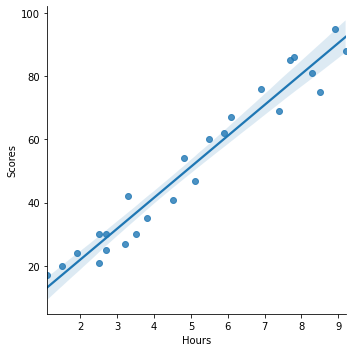

In [8]:
sns.lmplot(data = student_df, x = 'Hours', y = 'Scores')
plt.show()

- `Hours` and `Scores` are linearly dependent on each other.

### Checking for outliers

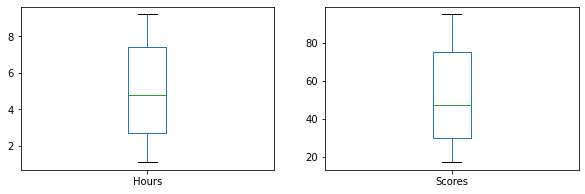

In [9]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
student_df.Hours.plot.box()
plt.subplot(1,2,2)
student_df.Scores.plot.box()
plt.show()

- There are no outliers

### Correlation Matrix

In [10]:
student_df[['Hours','Scores']].corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


- There is a `strong positive correlation` between `Hours` and `Scores`. The correlation coefficient is `0.976`

## Data Preparation

### Splitting the Data into X (independent variable dataframe) and y(dependent / target variable) 

In [11]:
X = np.array(student_df['Hours']).reshape(-1,1) # since, there is only one independent variable. reshaping the X to (rows, 1)
y = np.array(student_df['Scores']).reshape(-1,1) 

### Train - Test Split

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17, 1), (8, 1), (17, 1), (8, 1))

## Model Building

### Linear Regression using Statsmodels

In [14]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)

model = sm.OLS(y_train ,X_train_sm)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     334.4
Date:                Thu, 12 Nov 2020   Prob (F-statistic):           1.15e-11
Time:                        12:44:57   Log-Likelihood:                -53.270
No. Observations:                  17   AIC:                             110.5
Df Residuals:                      15   BIC:                             112.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4951      3.169      0.472      0.6

## Evaluating Model

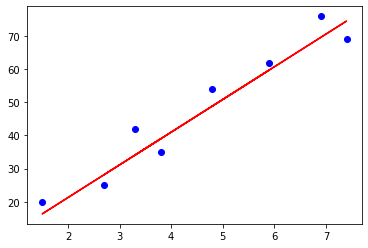

In [15]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, 1.49514211 + 9.87171443 * X_test , color = 'red')
plt.show()

In [16]:
print(result.params)

[1.49514211 9.87171443]


In [17]:
from sklearn.metrics import mean_absolute_error, r2_score
print('mean_absolute_error:', mean_absolute_error(y_test, 1.49514211 + 9.87171443 * X_test))
print('r2_score:', r2_score(y_test, 1.49514211 + 9.87171443 * X_test))

mean_absolute_error: 4.762517890624997
r2_score: 0.9309458863222316


### The linear regression model using statsmodels is <b> `Scores = 1.495 + 9.872 * Hours`</b>

### Linear Regression using sklearn

In [18]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

model_sk = lm.fit(X_train, y_train)

y_pred = model_sk.predict(X_test)

## Evaluating Model

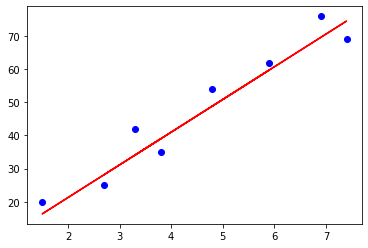

In [19]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.show()

In [20]:
print('Intercept', model_sk.intercept_)
print('Coefficient of Hours', model_sk.coef_)

Intercept [1.49514211]
Coefficient of Hours [[9.87171443]]


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score
print('mean_absolute_error:', mean_absolute_error(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

mean_absolute_error: 4.762517892332275
r2_score: 0.9309458862687437


- The model metrics are good

## The Question 

- <b>What will be predicted score if a student studies for 9.25 hrs/ day?
    - Sklearn model

In [22]:
print('The predicted score if a student studies for 9.25 hrs/day = ', float(model_sk.predict([[9.25]])))

The predicted score if a student studies for 9.25 hrs/day =  92.80850057353504


- <b> Statsmodel model

In [23]:
print('The predicted score if a student studies for 9.25 hrs/day = ', float(1.49514211 + 9.87171443 * 9.25))

The predicted score if a student studies for 9.25 hrs/day =  92.8085005875
